In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

I am abandoning the firestations. They have crashed and burned and the only way to put them out is to move on

In [2]:
bikes= pd.read_csv('../data/BikeRacks.csv')
bikes.head(1)

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept


In [3]:
bikes['geometry'] = bikes.apply(lambda x: Point((x.LON, 
                                                         x.LAT)), 
                                        axis=1)
bikes.head(3)

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept,POINT (-86.6554527779 36.0499277778)
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept,POINT (-86.6340625226 36.1852800378)
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept,POINT (-86.6206705697 36.1584215986)


In [4]:
uap = pd.read_excel('https://query.data.world/s/brwcqeyvq5izsf6zsdy4xnheu7wo4t')

In [5]:
print(uap)

              Date / Time Country        City State     Shape  \
0          12/21/16 19:15     USA  Waynesboro    VA    Sphere   
1          12/21/16 00:00     USA  Louisville    KY   Unknown   
2          12/20/16 22:30     USA  Santa Rosa    CA    Sphere   
3          12/20/16 19:00     USA      Fresno    CA    Circle   
4          12/19/16 21:53     USA     Reymert    AZ    Circle   
...                   ...     ...         ...   ...       ...   
5172  2016-01-01 00:00:00     USA   Elk Grove    CA     Light   
5173  2016-01-01 00:00:00     USA   Anchorage    AK    Circle   
5174  2016-01-01 00:00:00     USA   Sodaville    OR    Sphere   
5175  2016-01-01 00:00:00     USA      Arnold    MO  Triangle   
5176  2016-01-01 00:00:00     USA      Vernon    CT    Sphere   

                                                Summary        lat         lng  
0                  Bright round object hovering in sky.  38.065229  -78.905888  
1     Multiple craft ascending from north of Shelbyv...  

In [6]:
uap = uap[['City', 'State', 'Shape', 'lat', 'lng']]
AP_TN = uap.loc[uap['State'] == 'TN']

In [7]:
uap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    5177 non-null   object 
 1   State   5177 non-null   object 
 2   Shape   5177 non-null   object 
 3   lat     5177 non-null   float64
 4   lng     5177 non-null   float64
dtypes: float64(2), object(3)
memory usage: 202.4+ KB


In [8]:
AP_TN['City'].value_counts()

Knoxville       11
Nashville       10
Murfreesboro     6
Memphis          4
Bristol          3
                ..
Hermitage        1
Harrogate        1
Clinton          1
Pigeon Forge     1
Seymour          1
Name: City, Length: 63, dtype: int64

In [9]:
AP_Nash = AP_TN.loc[AP_TN['City']== 'Nashville']

In [10]:
AP_Nash['geometry'] = AP_TN.apply(lambda x: Point((x.lng, 
                                                         x.lat)), 
                                        axis=1)
AP_Nash.head(3);

C:\Users\pcunn\AppData\Local\Temp\ipykernel_22592\47260766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AP_Nash['geometry'] = AP_TN.apply(lambda x: Point((x.lng,


In [11]:
uap['Shape'].value_counts()

Light        1118
Circle        678
Triangle      498
Unknown       431
Fireball      430
Other         333
Sphere        313
Disk          210
Formation     199
Oval          191
Flash         128
Changing      120
Rectangle     102
Cigar          97
Cylinder       72
Chevron        68
Diamond        64
Teardrop       50
Egg            31
Cross          23
Cone           21
Name: Shape, dtype: int64

In [12]:
Tenn = gpd.read_file('../data/county/tncounty.shp')

In [13]:
uap


,City,State,Shape,lat,lng
0,Waynesboro,VA,Sphere,38.065229,-78.905888
1,Louisville,KY,Unknown,38.254238,-85.759407
2,Santa Rosa,CA,Sphere,38.440467,-122.714431
3,Fresno,CA,Circle,36.729529,-119.708861
4,Reymert,AZ,Circle,33.229779,-111.209290
...,...,...,...,...,...
5172,Elk Grove,CA,Light,38.408799,-121.371618
5173,Anchorage,AK,Circle,61.216313,-149.894852
5174,Sodaville,OR,Sphere,44.483395,-122.869982
5175,Arnold,MO,Triangle,38.432832,-90.377619


In [14]:
quit_naming_stuff = pd.concat([Tenn, uap])
quit_naming_stuff.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,City,State,Shape,lat,lng
0,76.0,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",NaN,NaN,NaN,NaN,NaN
1,77.0,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",NaN,NaN,NaN,NaN,NaN
2,78.0,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",NaN,NaN,NaN,NaN,NaN
3,79.0,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",NaN,NaN,NaN,NaN,NaN
4,80.0,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

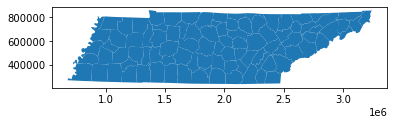

In [15]:
Tenn.plot()

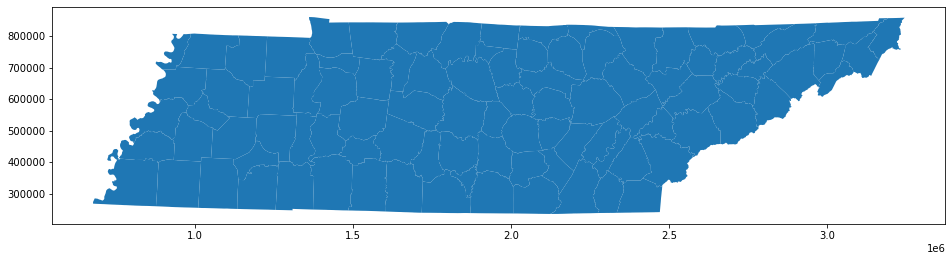

In [16]:
fig, ax = plt.subplots(figsize=(16,4))
Tenn.plot(ax = ax);

In [17]:
Tenn.crs

<Projected CRS: EPSG:2274>
Name: NAD83 / Tennessee (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Tennessee
- bounds: (-90.31, 34.98, -81.65, 36.68)
Coordinate Operation:
- name: SPCS83 Tennessee zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [18]:
AP_TN['City'].value_counts()

Knoxville       11
Nashville       10
Murfreesboro     6
Memphis          4
Bristol          3
                ..
Hermitage        1
Harrogate        1
Clinton          1
Pigeon Forge     1
Seymour          1
Name: City, Length: 63, dtype: int64

#### NONE OF THIS WORKED. TRYING AGAIN FURTHER DOWN

In [19]:
#AP_TN['County'] = AP_TN.apply(lambda row: 
#     'Anderson' if row['City'] == "Andersonville"|"Clinton"|"Oak Ridge"
#                              elif row['City'] == "Rover"|"Shelbyville":
#         return 'Bedford'
#     elif row['City'] =='Maryville':
#         return 'Blount'
#     elif row['City'] =='Charleston'|'Cleveland':
#         return 'Bradley'
#     elif row['City'] =='Ivy Bluff':
#         return 'Cannon'
#     elif row['City'] =='Huntingdon'|'Trezevant':
#         return 'Carroll'
#     elif row['City'] =='Elizabethton':
#         return 'Carter'
#     elif row['City'] =='Hendersonville':
#         return 'Chester'
#     elif row['City'] =='Harrogate':
#         return 'Claiborne'
#     elif row['City'] =='Bybee':
#         return 'Cocke'
#     elif row['City'] =='Lake Tansi':
#           return 'Cumberland'
#     elif row['City'] =='Antioch'|'Bellevue'|'Goodlettsville'|'Hermitage'|'Nashville':
#         return 'Davidson'
#     elif row['City'] =='Dyersburg'|'Newbern':
#         return 'Dyer'
#     elif row['City'] =='Bean Station'|'Blaine':
#         return 'Grainger'
#     elif row['City'] =='Lupton City'|'Hixson':
#         return 'Hamilton'
#     elif row['City'] =='Rogersville':
#         return 'Hawkins'
#     elif row['City'] =='Waverly':
#         return 'Humphreys'
#     elif row['City'] =='Farragut'|'Knoxville':
#         return 'Knox'
#     elif row['City'] =='Powell':
#         return 'Marion'
#     elif row['City'] =='Columbia'|'Spring hill':
#         return 'Maury'
#     elif row['City'] =='Ten Mile':
#         return 'Meigs'
#     elif row['City'] =='Clarksville':
#         return 'Montgomery'
#     elif row['City'] =='Lancing':
#         return 'Morgan'
#     elif row['City'] =='Byrdstown':
#         return 'Pickett'
#     elif row['City'] =='Dayton'|'Gray':
#         return 'Rhea'
#     elif row['City'] =='White House':
#         return 'Robertson'
#     elif row['City'] =='Murfreesboro'|'Smyrna':
#         return 'Rutherford'
#     elif row['City'] =='Mt. Juliet'|'Lebanon':
#         return 'Wilson'
#     elif row['City'] =='Franklin':
#         return 'Williamson'
#     elif row['City'] =='Jonesborough':
#         return 'Washington'
#     elif row['City'] =='Morristown':
#         return 'Warren'
#     elif row['City'] =='Gallatin'|'Portland':
#         return 'Sumner'
#     elif row['City'] =='Kingsport'|'Johnson City'|'Bristol'|'Blountville':
#         return 'Sullivan'
#     elif row['City'] =='Gordonsville':
#         return 'Smith'
#     elif row['City'] =='Eads'|'Memphis'| 'Millington':
#         return 'Shelby'
#     else:
#         return 'Sevier')

In [20]:
AP_TN.loc[(AP_TN['City']=="Andersonville") | (AP_TN['City']=="Clinton") | (AP_TN['City']=="Oak Ridge"), 'County_'] = 'Anderson'
AP_TN.loc[(AP_TN['City']=="Rover") | (AP_TN['City']=="Shelbyville"), 'County_'] = 'Bedford'
AP_TN.loc[(AP_TN['City']=='Maryville'), "County_"] = 'Blount'
AP_TN.loc[(AP_TN['City']=='Charleston') | (AP_TN['City']=='Cleveland'), 'County_' ]= 'Bradley'
AP_TN.loc[(AP_TN['City']=='Ivy Bluff'), "County_" ]= 'Cannon'
AP_TN.loc[(AP_TN['City']=='Huntingdon') | (AP_TN['City']=='Trezevant'), 'County_' ]= 'Carroll'
AP_TN.loc[(AP_TN['City']=='Elizabethton'), "County_" ]= 'Carter'
AP_TN.loc[(AP_TN['City']=='Hendersonville'), "County_" ]= 'Chester'
AP_TN.loc[(AP_TN['City']=='Harrogate'), "County_" ]= 'Claiborne'
AP_TN.loc[(AP_TN['City']=='Bybee'), "County_" ]= 'Cocke'
AP_TN.loc[(AP_TN['City']=='Lake Tansi'), "County_" ]= 'Cumberland'
AP_TN.loc[(AP_TN['City']=="Antioch") | (AP_TN['City']=='Bellevue') | (AP_TN['City']=='Goodlettsville') | (AP_TN['City']=='Hermitage') |(AP_TN['City']=='Nashville'), 'County_'] = 'Davidson'
AP_TN.loc[(AP_TN['City']=='Dyersburg') | (AP_TN['City']=='Newbern'), 'County_' ]= 'Dyer'
AP_TN.loc[(AP_TN['City']=='Bean Station') | (AP_TN['City']=='Blaine'), 'County_' ]= 'Grainger'
AP_TN.loc[(AP_TN['City']=='Lupton City') | (AP_TN['City']=='Hixson'), 'County_' ]= 'Hamilton'
AP_TN.loc[(AP_TN['City']=='Rogersville'), "County_" ]= 'Hawkins'
AP_TN.loc[(AP_TN['City']=='Waverly'), "County_" ]= 'Humphreys'
AP_TN.loc[(AP_TN['City']=='Farragut') | (AP_TN['City']=='Knoxville'), 'County_' ]= 'Knox'
AP_TN.loc[(AP_TN['City']=='Powell'), "County_" ]= 'Marion'
AP_TN.loc[(AP_TN['City']=='Columbia') | (AP_TN['City']=='Spring hill'), 'County_' ]= 'Maury'
AP_TN.loc[(AP_TN['City']=='Ten Mile'), "County_" ]= 'Meigs'
AP_TN.loc[(AP_TN['City']=='Clarksville'), "County_" ]= 'Montgomery'
AP_TN.loc[(AP_TN['City']=='Lancing'), "County_" ]= 'Morgan'
AP_TN.loc[(AP_TN['City']=='Byrdstown'), "County_" ]= 'Pickett'
AP_TN.loc[(AP_TN['City']=='Dayton') | (AP_TN['City']=='Gray'), 'County_' ]= 'Rhea'
AP_TN.loc[(AP_TN['City']=='Murfreesboro') | (AP_TN['City']=='Smyrna'), 'County_' ]= 'Rutherford'
AP_TN.loc[(AP_TN['City']=='Mt. Juliet') | (AP_TN['City']=='Lebanon'), 'County_' ]= 'Wilson'
AP_TN.loc[(AP_TN['City']=='Gallatin') | (AP_TN['City']=='Portland'), 'County_' ]= 'Sumner'
AP_TN.loc[(AP_TN['City']=='White House'), "County_" ]= 'Robertson'
AP_TN.loc[(AP_TN['City']=='Franklin'), "County_" ]= 'Williamson'
AP_TN.loc[(AP_TN['City']=='Jonesborough'), "County_" ]= 'Washington'
AP_TN.loc[(AP_TN['City']=='Morristown'), "County_" ]= 'Warren'
AP_TN.loc[(AP_TN['City']=='Gordonsville'), "County_" ]= 'Smith'
AP_TN.loc[(AP_TN['City']=='Eads') | (AP_TN['City']=='Memphis') | (AP_TN['City']=="Millington"), 'County_' ]= 'Shelby'
AP_TN.loc[(AP_TN['City']=='Kingsport') | (AP_TN['City']=='Johnson City') | (AP_TN['City']=='Bristol') | (AP_TN['City']=='Blountville'), 'County_' ]= 'Sullivan'
AP_TN.loc[(AP_TN['City']=='Gatlinburg') | (AP_TN['City']=='Pigeon Forge') | (AP_TN['City']=='Seymour') | (AP_TN['City']=='Great Smoky Mountains National Park'), 'County_']= 'Sevier'


print(AP_TN)

              City State     Shape        lat        lng   County_
29          Hixson    TN     Other  35.236207 -85.298206  Hamilton
36    Johnson City    TN  Triangle  36.313440 -82.353473  Sullivan
85        Farragut    TN     Light  35.884524 -84.153526      Knox
100        Lancing    TN   Diamond  36.120631 -84.653831    Morgan
165       Portland    TN     Light  36.581709 -86.516383    Sumner
...            ...   ...       ...        ...        ...       ...
5061     Nashville    TN     Light  36.162230 -86.774353  Davidson
5086       Seymour    TN  Changing  35.881048 -83.776618    Sevier
5114     Nashville    TN  Changing  36.162230 -86.774353  Davidson
5119      Gallatin    TN  Triangle  36.388303 -86.447590    Sumner
5121   Spring Hill    TN     Other  35.751179 -86.930002       NaN

[108 rows x 6 columns]


C:\Users\pcunn\AppData\Local\Temp\ipykernel_22592\2143174601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AP_TN.loc[(AP_TN['City']=="Andersonville") | (AP_TN['City']=="Clinton") | (AP_TN['City']=="Oak Ridge"), 'County_'] = 'Anderson'


In [21]:
type(AP_TN)

pandas.core.frame.DataFrame

In [24]:
AP_TN.head(1)

,City,State,Shape,lat,lng,County_
29,Hixson,TN,Other,35.236207,-85.298206,Hamilton


In [25]:
counties = pd.merge(left = Tenn, right = AP_TN, 
                    left_on = 'NAME', right_on = 'County_')
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,City,State,Shape,lat,lng,County_
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",Hendersonville,TN,Triangle,36.304774,-86.619996,Chester
1,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",Hixson,TN,Other,35.236207,-85.298206,Hamilton
2,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",Lupton City,TN,Circle,35.105713,-85.264264,Hamilton
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",Lupton City,TN,Disk,35.105713,-85.264264,Hamilton
4,81,Robertson,47147,1.328462e+10,562663.703799,"POLYGON ((1638980.637 774369.872, 1639040.173 ...",White House,TN,Fireball,36.470323,-86.651384,Robertson


In [48]:
sightings= counties['Shape'].value_counts().to_frame()
sightings

,Shape
Light,23
Circle,17
Triangle,14
Unknown,9
Fireball,5
Changing,5
Formation,4
Sphere,4
Diamond,4
Other,4


In [49]:
I_want_to_believe=counties['County_'].value_counts().to_frame()
I_want_to_believe

,County_
Davidson,15
Knox,12
Sullivan,9
Rutherford,7
Shelby,6
Sevier,4
Wilson,3
Williamson,3
Hamilton,3
Anderson,3


In [60]:
unknown=counties.append(sightings, ignore_index=True)

C:\Users\pcunn\AppData\Local\Temp\ipykernel_22592\28901012.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unknown=counties.append(sightings, ignore_index=True)


In [61]:
x_file = unknown.append(I_want_to_believe, ignore_index=False)

C:\Users\pcunn\AppData\Local\Temp\ipykernel_22592\4009830676.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_file = unknown.append(I_want_to_believe, ignore_index=False)


In [62]:
type(x_file)

geopandas.geodataframe.GeoDataFrame

In [64]:
x_file.head(1)

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,City,State,Shape,lat,lng,County_
0,76.0,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",Hendersonville,TN,Triangle,36.304774,-86.619996,Chester


ValueError: Unrecognized location 'center bottom'. Valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center


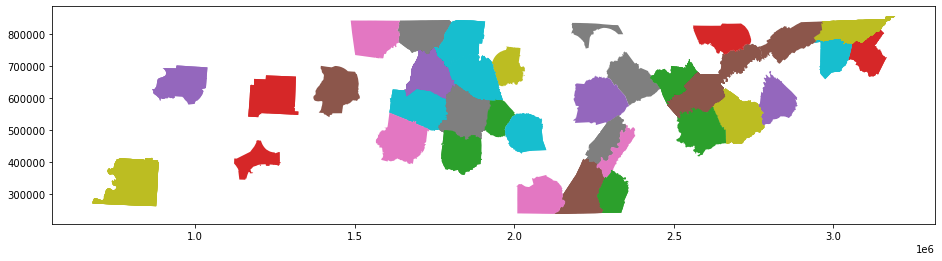

In [71]:
fig, ax = plt.subplots(figsize=(16,4))
x_file.plot(column = 'County_', 
            legend = True,
            legend_kwds={'loc': 'center bottom'},
              ax = ax)
ax.axis('off');

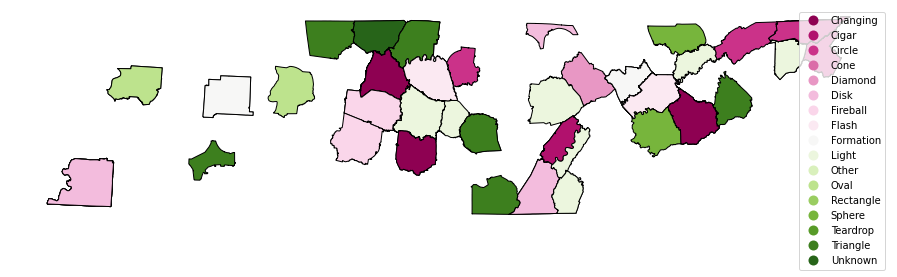

In [68]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'Shape', 
              cmap = 'PiYG', 
              legend=True,
              edgecolor = 'black', 
              ax = ax)
ax.axis('off');

In [ ]:
sightings.info()

In [ ]:
counties = gpd.sjoin(sightings, Tenn, op = 'within')
counties.head()

In [ ]:
type(counties)

In [ ]:
counties.rename(columns= {"NAME": "County", "geometry_x": "Polygon", "geometry_y": "Point", "Shape_y": "Appearance"}).head(1)

In [ ]:
del counties["OBJECTID"]
del counties['KEY']
del counties['City']
#del counties['State_x']
#del counties['Shape_x']
del counties['lat_x']
del counties['lng_x']
counties['County_'].value_counts()

In [ ]:
print(counties.head(1))

In [ ]:
Triangles= sightings.loc[sightings['Shape']== 'Triangle']
Triangles.shape

In [ ]:
Polygon=Tenn.loc[Tenn['NAME']== Tenn['NAME']]
Polygon.shape

In [ ]:
counties.head(1)
counties.rename(columns={'geometry_y': 'geometry'})

In [ ]:
ax = Polygon.plot(figsize = (18, 10), color = 'gray')
Triangles.plot( ax = ax, column ='County_');
plt.show();
#Triangles.info()

In [ ]:
counties.info()

In [ ]:
follow_the_stars = folium.Map(location =  Polygon, zoom_start = 12)

folium.GeoJson(Triangles).add_to(follow_the_stars)
#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in counties.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['County_'])
    icon=folium.Icon(color="black",icon="rocket", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(follow_the_stars)


#display our map
follow_the_stars